In [1]:
# Import packages
### YOUR CODE HERE ###
#step 1
import numpy as np
import pandas as pd

# step 2
import matplotlib.pyplot as plt
import seaborn as sns

# step 3/4
# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'avg_monthly_hrs',
                          'time_spend_company': 'time',
                          'Department': 'department'})




# Display all column names after the update
### YOUR CODE HERE ###
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hrs', 'time', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hrs          0
time                     0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,time,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,time,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


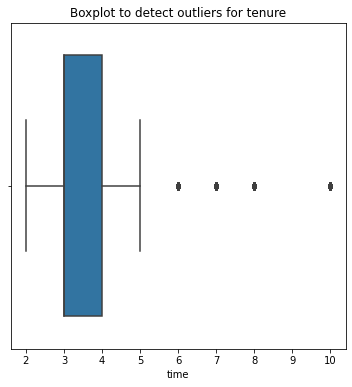

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)

sns.boxplot(x=df['time'])
plt.show()


In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
percentile25 = df['time'].quantile(0.25)

percentile75 = df['time'].quantile(0.75)

interquartile = percentile75 - percentile25

upper = percentile75 + 1.5 * interquartile
lower = percentile25 - 1.5 * interquartile

outliers = df[(df['time'] > upper) | (df['time'] < lower)]
len(outliers)

824

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(len(df[df['left']==1]))
print(len(df[df['left']==0]))

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(len(df[df['left']==1])/len(df))
print(len(df[df['left']==0])/len(df))

1991
10000
0.1660411975648403
0.8339588024351597


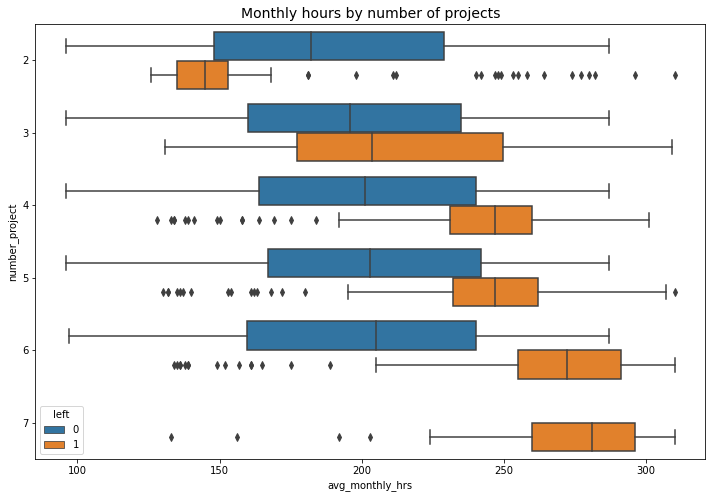

In [14]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
plt.figure(figsize = (12,8))


sns.boxplot(data=df, x='avg_monthly_hrs', y='number_project', hue='left', orient="h")
plt.title('Monthly hours by number of projects', fontsize='14')


# Display the plots
plt.show()


Text(0.5, 1.0, 'Time histogram')

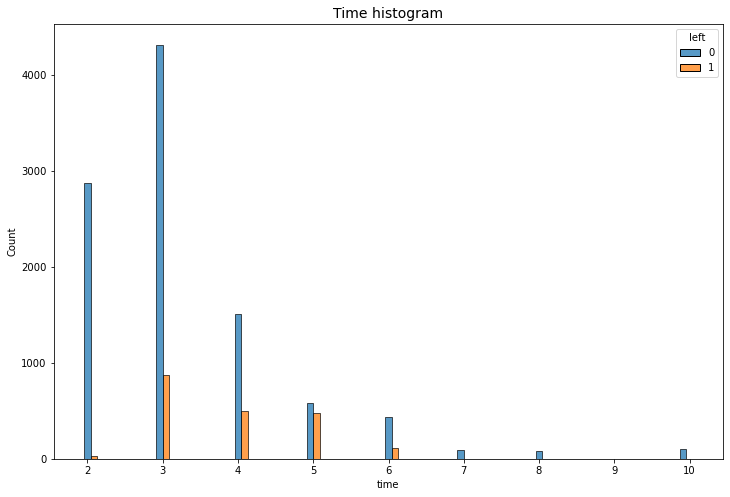

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize = (12,8))

tenure_stay = df[df['left']==0]['time']
tenure_left = df[df['left']==1]['time']

sns.histplot(data=df, x='time', hue='left', multiple='dodge', shrink=2)

plt.title('Time histogram', fontsize='14')

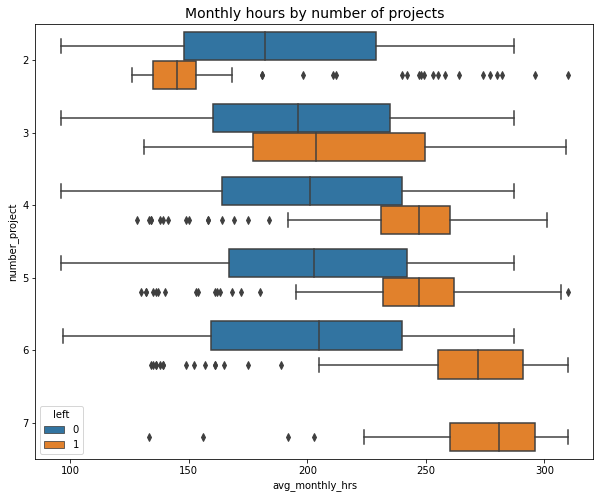

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize = (10,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df, x='avg_monthly_hrs', y='number_project', hue='left', orient="h")

plt.title('Monthly hours by number of projects', fontsize='14')


plt.show()

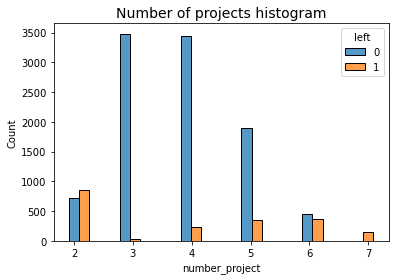

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
tenure_stay = df[df['left']==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, x='number_project', hue='left', multiple='dodge', shrink=2)
plt.title('Number of projects histogram', fontsize='14')
plt.show()

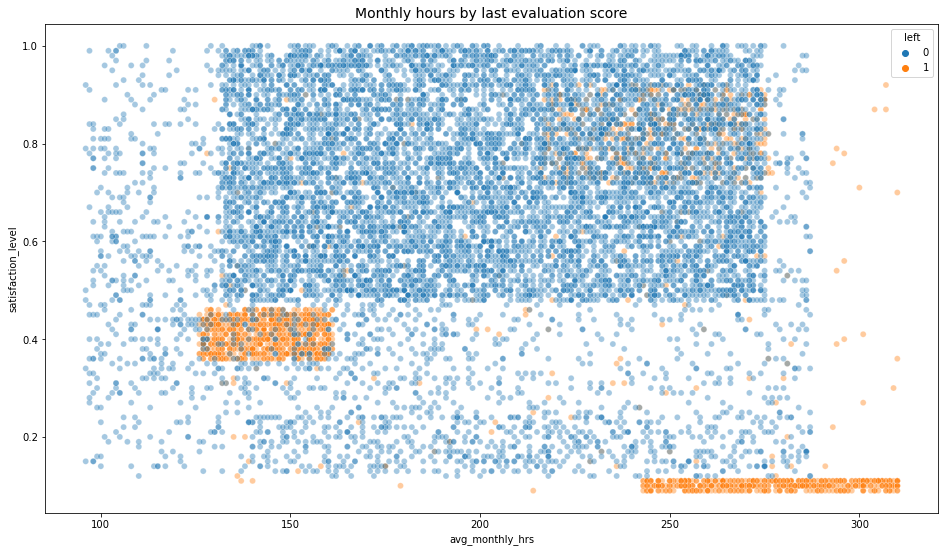

In [18]:
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='avg_monthly_hrs', y='satisfaction_level', hue='left', alpha=0.4)
# plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
# plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

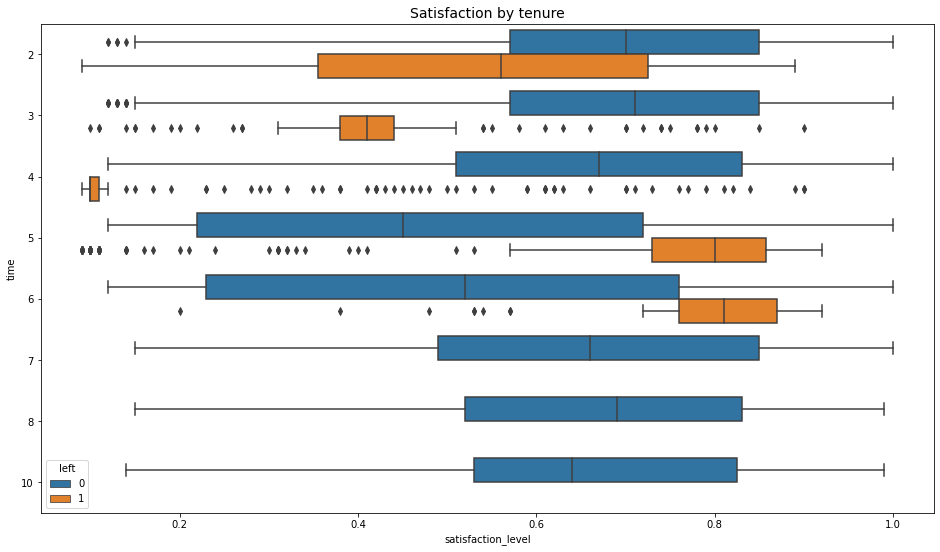

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.boxplot(data=df, x='satisfaction_level', y='time', hue='left', orient="h")

plt.title('Satisfaction by tenure', fontsize='14')


plt.show();

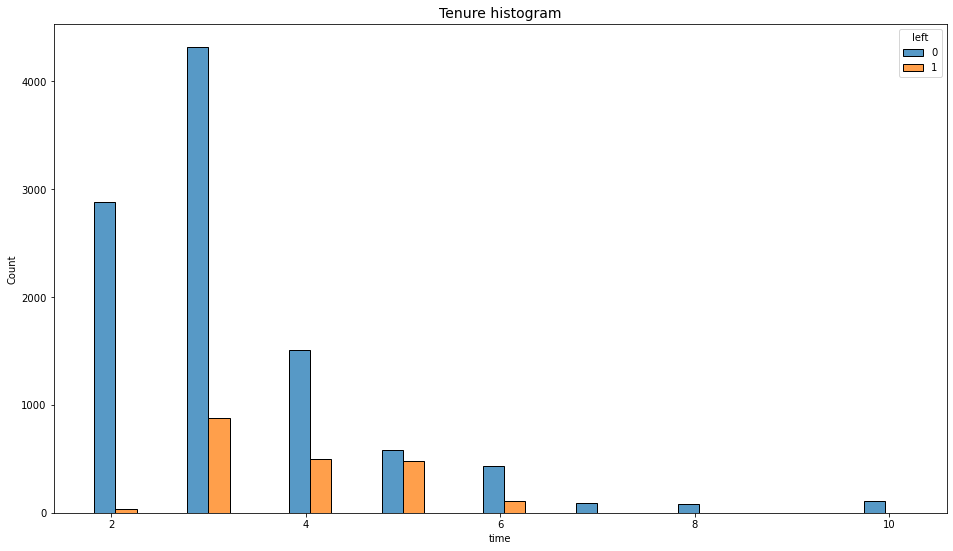

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
tenure_stay = df[df['left']==0]['time']
tenure_left = df[df['left']==1]['time']
sns.histplot(data=df, x='time', hue='left', multiple='dodge', shrink=5)
plt.title('Tenure histogram', fontsize='14')
plt.show();

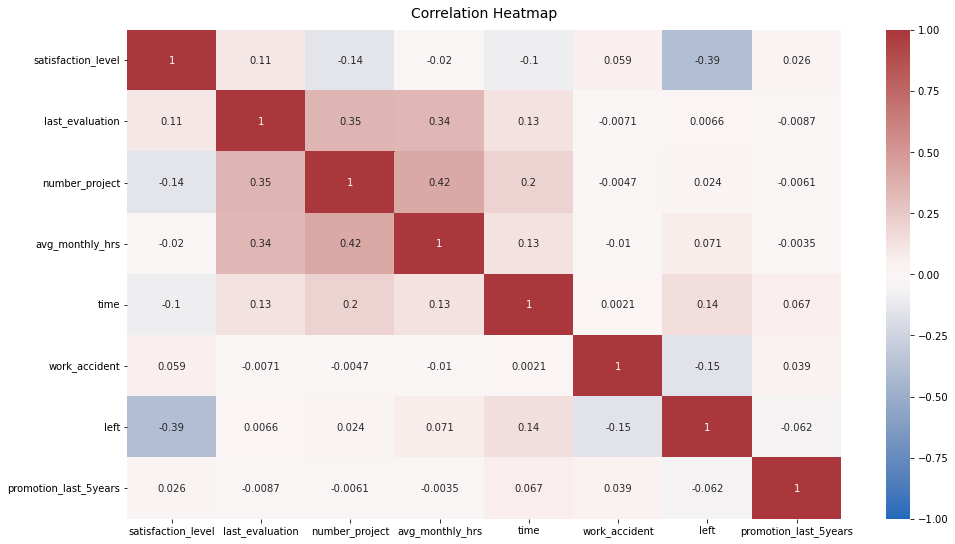

In [21]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [22]:
# Make sure all columns are numerical: salary and salary

# Convert categorical data to numerical data using LabelEncoder
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
df["salary"].unique()

array([1, 2, 0])

In [23]:
encoded = pd.get_dummies(df, drop_first=False)


encoded.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,time,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [24]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
no_outliers = encoded[(encoded['time'] >= lower) & (encoded['time'] <= upper)]

# Display first few rows of new dataframe
no_outliers.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,time,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [25]:
y = no_outliers['left']

In [26]:

X = no_outliers.drop('left', axis=1)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [28]:
clf = LogisticRegression(solver='liblinear').fit(X_train,y_train)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.819842
Precision: 0.442857
Recall: 0.263270
F1 Score: 0.330226


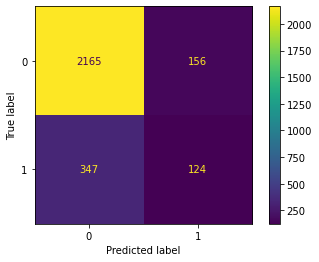

In [31]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf.classes_)
disp.plot(values_format='')

In [35]:
## Random Forest Classifier
model = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  


scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}


model_ = GridSearchCV(model, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [36]:
%%time
model_.fit(X_train, y_train)

CPU times: user 9min 13s, sys: 960 ms, total: 9min 14s
Wall time: 9min 14s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [38]:
model_.best_score_

0.9803420377385452

In [40]:
 model_.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 300}

In [43]:
preds = model_.best_estimator_.predict(X_test)

In [44]:
auc = roc_auc_score(y_test, preds)
auc 

0.9632447577779181

In [45]:
accuracy = accuracy_score(y_test, preds)
accuracy

0.9853151862464183

In [46]:
precision = precision_score(y_test, preds)
precision

0.9820627802690582

In [47]:
recall = recall_score(y_test, preds)
recall

0.9299363057324841

In [48]:
f1 = f1_score(y_test, preds)
f1

0.9552889858233369